In [1]:
using SchwarzChristoffel

INFO: Recompiling stale cache file /Users/jeff/.julia/lib/v0.6/SchwarzChristoffel.ji for module SchwarzChristoffel.


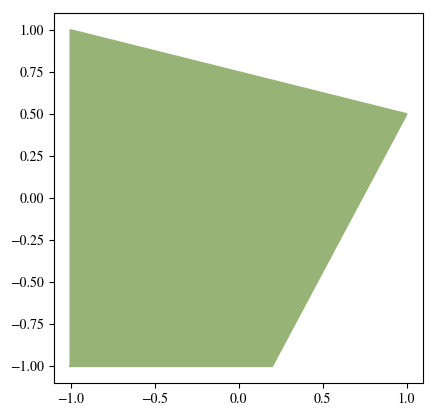

In [33]:
p = Polygon([-1.0,0.2,1.0,-1.0],[-1.0,-1.0,0.5,1.0])
plot(p)

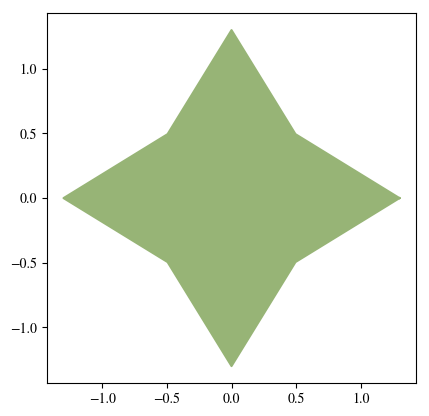

In [5]:
n = 4; dθ = 2π/(2n)
θ = collect(0:dθ:2π-dθ)
w = (1+0.3cos.(n*θ)).*exp.(im*θ)
p = Polygon(w)
plot(p)

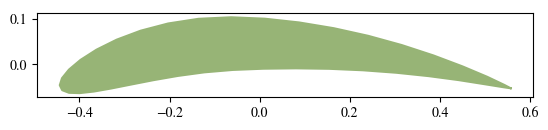

In [41]:
w = naca4(0.1,0.4,0.12;len=1)
p = Polygon(w)
plot(p)

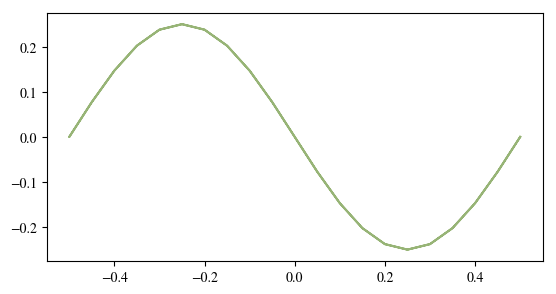

In [8]:
ht = 0.25
nwave = 2
nseg = 20
x = 1.0
len = 1.0
dx = len/nseg
vert = Complex128[]
for j = 1:nseg+1
    push!(vert,x+im*ht*sin(π*nwave*x))
    x -= dx
end
vert = [vert;flipdim(vert[2:end-1],1)]
vert -=mean(vert)
p = Polygon(vert);
plot(p)

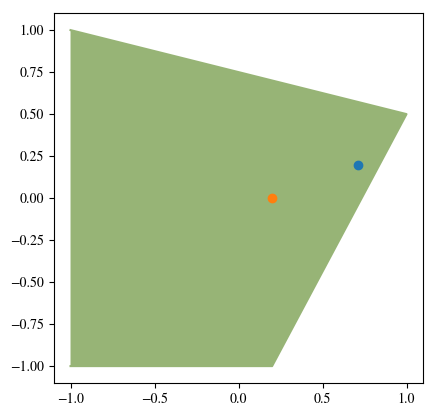

1×2 BitArray{2}:
 true  true

In [6]:
z = [0.71+im*0.2 0.2+im*0]
plot(p)
PyPlot.plot(real.(z),imag.(z),marker="o")
isinpoly.(z,p,1e-5)

In [6]:
m = ExteriorMap(p)

Exterior map with 8 vertices
   vertices: (1.3,0.0), (0.495,0.495), (0.0,1.3), (-0.495,0.495), (-1.3,0.0), (-0.495,-0.495), (-0.0,-1.3), (0.495,-0.495), 
   interior angles/π: 0.351, 1.149, 0.351, 1.149, 0.351, 1.149, 0.351, 1.149, 
   prevertices on circle: (1.0,0.0), (0.7071,-0.7071), (-0.0,-1.0), (-0.7071,-0.7071), (-1.0,0.0), (-0.7071,0.7071), (0.0,1.0), (0.7071,0.7071), 
   prevertex angles/π: -0.0, 0.25, 0.5, 0.75, 1.0, -0.75, -0.5, -0.25, 
   constant = -1.0224 + 0.0im, accuracy = 1.0e-8, 
   number of multipole coefficients = 12


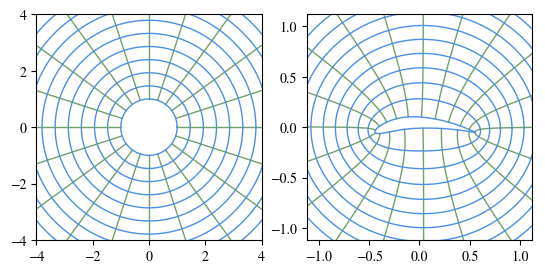

In [43]:
conformal_grid(m)

In [11]:
m = ExteriorMap(p;tol=1e-12)

Exterior map with
   vertices: (-1.0,-1.0), (0.2,-1.0), (1.0,0.5), (-1.0,1.0), 
   interior angles/π: 0.5, 0.656, 0.422, 0.422, 
   prevertices on circle: (1.0,0.0), (0.3764,-0.9265), (-0.9024,-0.4309), (-0.1868,0.9824), 
   constant = 0.6722 + 0.7669im, accuracy = 1.0e-12, 
   number of multipole coefficients = 12


In [9]:
prev, C = parameters(m)

(Complex{Float64}[1.0+0.0im, 0.376406-0.926455im, -0.902383-0.430935im, -0.186756+0.982406im], 0.6722109863402015 + 0.7668866078562682im)

In [42]:
area(m)/ccoeff[1]

2.3639234904370356 - 0.0im

In [45]:
ccoeff, dcoeff = coefficients(m);

In [46]:
ccoeff

14-element Array{Complex{Float64},1}:
      1.12786+0.0im        
 -1.42493e-16+4.60899e-17im
 -3.13044e-17-3.13044e-16im
  6.26088e-17-3.86088e-16im
  3.30026e-16-3.13044e-17im
   5.0087e-17+1.37739e-16im
 -3.96522e-17-3.13044e-17im
  9.98759e-17-5.96274e-18im
     0.202134+1.75453e-14im
 -7.43133e-18-1.09806e-17im
  1.41027e-17+8.39839e-17im
 -6.77881e-17+1.23623e-16im
 -1.93438e-16+7.8648e-18im 
 -3.88048e-17-9.57267e-17im

In [5]:
zeta = [0.1,0.5-0.75im,-0.25-0.3im]
dz, ddz = evalderiv(zeta,m,true);
dz

3-element Array{Complex{Float64},1}:
  67.2068+76.6284im 
 -1.11666+0.544576im
  3.99129-5.30641im 

In [6]:
zeta = [1.0+3.0im,-2.0-2.0im,0.0+1.1im]
z = evaluate(zeta,m)

3-element Array{Complex{Float64},1}:
   0.81614+3.02956im 
  -2.25237-2.08523im 
 -0.333104+0.975837im

In [16]:
zeta = collect(1.1:0.1:2.0) + 0.1im
dz,ddz = evalderiv(zeta,m)
dz

10-element Array{Complex{Float64},1}:
 0.872356-0.394475im 
 0.901724-0.289355im 
 0.925562-0.217994im 
 0.944059-0.168264im 
 0.958255-0.132657im 
  0.96919-0.106522im 
 0.977695-0.0869128im
 0.984389-0.0719115im
 0.989723-0.0602376im
 0.994025-0.0510144im

In [11]:
z = evaluate(zeta,m)

3-element Array{Complex{Float64},1}:
   0.81614+3.02956im 
  -2.25237-2.08523im 
 -0.333104+0.975837im

In [7]:
mean([sum(ccoeff.*zeta[i].^(1:-1:-m.ncoeff))-z[i] for i = 1:length(zeta)])

2.5518320641274943e-5 + 8.985895672545634e-5im

In [2]:
a = 0.5
b = 0.1
c = Complex128[0.5(a+b),0,0.5(a-b)]
m = PowerMap(c)

Power series map:
   multipole coefficients: c₁ = 0.3 + 0.0im, c₀ = 0.0 + 0.0im, c₋ᵢ = 0.2 + 0.0im, i = 1:1


In [3]:
coefficients(m)

(Complex{Float64}[0.3+0.0im, 0.0+0.0im, 0.2+0.0im], Complex{Float64}[0.13+0.0im, 0.0+0.0im, 0.06+0.0im])

In [4]:
length(m)

200

In [4]:
Jmoment(m)

0.010210176124166824

In [7]:
centroid(m)

-0.0 - 0.0im